In [1]:
from lib.data import *
data, raw = get_default_oec_rca_raw_data()

Se cargaron los datos desde ../data/default_oce_2018-2020.pkl


In [2]:
import numpy as np
import time
import matplotlib.pyplot as plt

In [3]:
import economic_complexity as ecplx

rca = ecplx.rca(data)
M = build_M_from(rca)
cant_paises = len(M.index.to_list())

In [4]:
#from informe import SimuladorEstatico, SimuladorDinamico, SimuladorComplejo, PaisNaive
from informe import *
from lib.utils import correr_simulacion_mostrando, cantidad_descubrimientos_iteracion

Usando el valor de $\Omega$ hallado nos preguntamos como afecta la estrategia en la evolución en complejidad de los paises.

Para esto dividimos en dos porciones los paises según dos clases, el 50% más complejo y el 50% menos complejo y probamos asignarle a cada clase un distinto tiempo de estrategia. 

Para eso primero necesitamos obtener la distribución de complejidades para cada país:

In [5]:
ECI, PCI = ecplx.complexity(M)

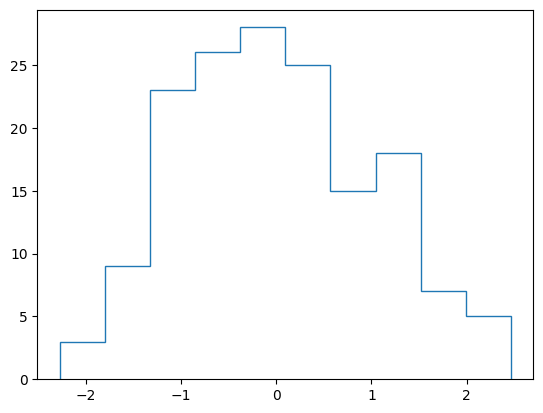

In [6]:
counts, bins = np.histogram(list(ECI), 10)
plt.stairs(counts, bins)

lo que es bastante aproximado a lo esperado:
![image.png](attachment:c07f20e8-0e32-4864-b7af-bc10d9f6a727.png)

 una distribución normal ~(0,1)

In [7]:
np.std(ECI)

0.9968503858773891

In [8]:
from informe import PaisCigarra, PaisHormiga

iteraciones = 35
omega = 0.55

def pais_factory_segun_complejidad(clase_simple, clase_complejo):
    return lambda **constructor_args: clase_complejo(**constructor_args) \
                                      if constructor_args["eci"] > 0 else clase_simple(**constructor_args)

In [9]:
sim_simplesHormigas_complejosHormigas = \
    SimuladorComplejo(lambda step: step >= iteraciones, 
                      pais_factory_segun_complejidad(clase_simple=PaisHormiga, clase_complejo=PaisHormiga), 
                      M.copy(deep=True), omega)
sim_simplesHormigas_complejosCigarras = \
    SimuladorComplejo(lambda step: step >= iteraciones, 
                      pais_factory_segun_complejidad(clase_simple=PaisHormiga, clase_complejo=PaisCigarra), 
                      M.copy(deep=True), omega)
sim_simplesCigarras_complejosHormigas = \
    SimuladorComplejo(lambda step: step >= iteraciones, 
                      pais_factory_segun_complejidad(clase_simple=PaisCigarra, clase_complejo=PaisHormiga), 
                      M.copy(deep=True), omega)
sim_simplesCigarras_complejosCigarras = \
    SimuladorComplejo(lambda step: step >= iteraciones, 
                      pais_factory_segun_complejidad(clase_simple=PaisCigarra, clase_complejo=PaisCigarra), 
                      M.copy(deep=True), omega)

proximidad calculada en: 0.18710708618164062


TypeError: pais_factory_segun_complejidad.<locals>.<lambda>() takes 0 positional arguments but 7 were given

In [ ]:
from lib.utils import correr_simulacion_mostrando

def pais_eci_collector(output, pais, productos_terminados):
    output[pais.country_name] = (pais.get_eci(), productos_terminados)

res_simplesHormigas_complejosHormigas = correr_simulacion_mostrando(sim_simplesHormigas_complejosHormigas, collector=pais_eci_collector)
print("#################################### simulación hormigas hormigas terminada #################################")
res_simplesHormigas_complejosCigarras = correr_simulacion_mostrando(sim_simplesHormigas_complejosCigarras, collector=pais_eci_collector)
print("#################################### simulación hormigas cigarras terminada #################################")
res_simplesCigarras_complejosHormigas = correr_simulacion_mostrando(sim_simplesCigarras_complejosHormigas, collector=pais_eci_collector)
print("#################################### simulación cigarras hormigas terminada #################################")
res_simplesCigarras_complejosCigarras = correr_simulacion_mostrando(sim_simplesCigarras_complejosCigarras, collector=pais_eci_collector)
print("#################################### simulación cigarras cigarras terminada #################################")

In [ ]:
# para cada iteración, me quedo con la dispersión:
def obtener_complejidades(data):
    res = []
    for iteracion in data:
        eci_it = np.array([eci for eci, _ in iteracion.values()])
        res.append(eci_it)
    return res

comp_simplesHormigas_complejosHormigas = obtener_complejidades(res_simplesHormigas_complejosHormigas)
comp_simplesHormigas_complejosCigarras = obtener_complejidades(res_simplesHormigas_complejosCigarras)
comp_simplesCigarras_complejosHormigas = obtener_complejidades(res_simplesCigarras_complejosHormigas)
comp_simplesCigarras_complejosCigarras = obtener_complejidades(res_simplesCigarras_complejosCigarras)

In [ ]:
comp_simplesHormigas_complejosHormigas

In [ ]:
res_simplesHormigas_complejosHormigas

In [ ]:
comp_simplesCigarras_complejosHormigas

In [ ]:
comp_simplesCigarras_complejosCigarras

In [ ]:
from matplotlib.ticker import MaxNLocator
import matplotlib.pyplot as plt
import numpy as np

fig = plt.figure(figsize=(10, 6))
fig.gca().xaxis.set_major_locator(MaxNLocator(integer=True))

stds_sH_cH = [np.std(x) for x in comp_simplesHormigas_complejosHormigas]
stds_sH_cC = [np.std(x) for x in comp_simplesHormigas_complejosCigarras]
stds_sC_cH = [np.std(x) for x in comp_simplesCigarras_complejosHormigas]
stds_sC_cC = [np.std(x) for x in comp_simplesCigarras_complejosCigarras]

plt.plot(range(len(comp_simplesHormigas_complejosHormigas)), stds_sH_cH, 
         label='simples: Hormigas - complejos: Hormigas', color = "r", linestyle='-')
plt.plot(range(len(comp_simplesHormigas_complejosCigarras)), stds_sH_cC, 
         label='simples: Hormigas - complejos: Cigarras', color = "g", linestyle='-')
plt.plot(range(len(comp_simplesCigarras_complejosHormigas)), stds_sC_cH, 
         label='simples: Cigarras - complejos: Hormigas', color = "b", linestyle='-')
plt.plot(range(len(comp_simplesCigarras_complejosCigarras)), stds_sC_cC, 
         label='simples: Cigarras - complejos: Cigarras', color = "cyan", linestyle='-')
plt.xlabel('Iteracion')
plt.ylabel('Desvio standard de la complejidad de los paises')
plt.title('Evolución del desvio standar de la complejidad de los paises según las distintas estrategias')
plt.legend()
plt.show()

In [ ]:
plt.plot(range(len(comp_simplesHormigas_complejosHormigas)), stds_sH_cH, 
         label='simples: Hormigas - complejos: Hormigas', color = "r", linestyle='-')
#plt.plot(range(len(comp_simplesHormigas_complejosCigarras)), stds_sH_cC, 
         #label='simples: Hormigas - complejos: Hormigas', color = "g", linestyle='-')
plt.plot(range(len(comp_simplesCigarras_complejosHormigas)), stds_sC_cH, 
         label='simples: Hormigas - complejos: Hormigas', color = "b", linestyle='-')
plt.plot(range(len(comp_simplesCigarras_complejosCigarras)), stds_sC_cC, 
         label='simples: Hormigas - complejos: Hormigas', color = "cyan", linestyle='-')
plt.xlabel('Iteracion')
plt.ylabel('Desvio standard de la complejidad de los paises')
plt.title('Evolución del desvio standar de la complejidad de los paises según las distintas estrategias')
plt.legend()
plt.show()

In [ ]:
strat_std = {}
strat_std["complejidades\niniciales"] = ECI
strat_std["simples cigarras\ncomplejos hormigas"] = np.concatenate(comp_simplesCigarras_complejosHormigas[-10:-1])
strat_std["simples cigarras\ncomplejos cigarras"] = np.concatenate(comp_simplesCigarras_complejosCigarras[-10:-1])

strat_std["simples hormigas\ncomplejos hormigas"] = np.concatenate(comp_simplesHormigas_complejosHormigas[-10:-1])
strat_std["simples hormigas\ncomplejos cigarras"] = np.concatenate(comp_simplesHormigas_complejosCigarras[-10:-1])

fig = plt.figure(figsize=(10, 6))
ax = plt.boxplot(strat_std.values())
fig.gca().set_xticklabels(list(strat_std.keys()))
plt.xlabel('Estrategia')
plt.ylabel('Complejidad de los paises')
plt.title(f'Complejidades en las últimas iteraciones')
plt.show()